<a href="https://colab.research.google.com/github/jihye134seo/AI_Study/blob/main/DACON/seoul_ttareung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

드라이브 마운트

# 라이브러리

1. 구글 드라이브 연동

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np

# 시각화에 필요한 라이브러리를 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리를 위한 라이브러리를 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 모델링을 위한 라이브러리를 import
from sklearn.ensemble import RandomForestClassifier

# 교차검증을 위한 라이브러리를 import
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# 쥬피터노트에서 결과를 출력하도록 설정
%matplotlib inline

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')

# EDA

1. 파일 가져오기

In [7]:
train = pd.read_csv('/content/drive/MyDrive/AI공부/DACON공부/[기초]서울시 따릉이 예측/DATA/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/AI공부/DACON공부/[기초]서울시 따릉이 예측/DATA/따릉이/test.csv')

2. 데이터 확인

In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dt

In [9]:
print(train.shape)
print(test.shape)

(1459, 11)
(715, 10)


In [10]:
train.head()
# test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [11]:
train_c = train.copy()
train_c.isnull().sum()

#시간(hour)을 기준으로 정렬
train_c = train_c.sort_values(by=['hour'])
train_c.head()

#결측치 앞 뒤 값으로 보간
train_c.isnull().sum()
train_c.interpolate(inplace=True)
train_c.isnull().sum()


id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

[0] 시간별 평균 따릉이 대여수 시각화

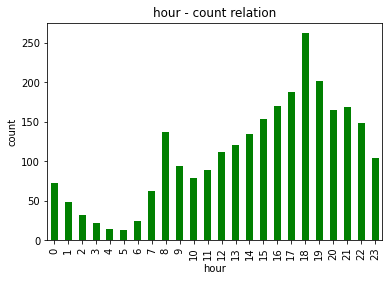

In [12]:
train_c.groupby(['hour'])['count'].mean().plot(kind = 'bar', color = 'green')

plt.title("hour - count relation")

plt.xlabel("hour")
plt.ylabel("count")

plt.show()

[1] 시간별 평균 온도, 평균 습도 시각화


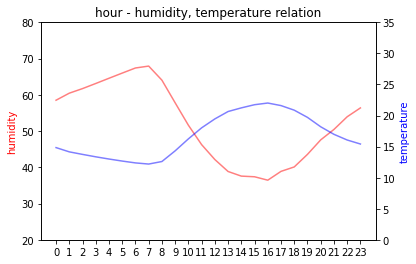

In [13]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
hour_hum = train_c.groupby(['hour'])['hour_bef_humidity'].mean()
hour_tem = train_c.groupby(['hour'])['hour_bef_temperature'].mean()

hour_hum = np.array(hour_hum)
hour_tem = np.array(hour_tem)

fig, ax1 = plt.subplots()
ax1.plot(x, hour_hum, color = 'red', alpha = 0.5)
ax1.set_ylabel('humidity', color = 'red', rotation = 90)
ax1.set_ylim(20, 80)

ax2 = ax1.twinx()
ax2.plot(x, hour_tem, color = 'blue', alpha = 0.5)
ax2.set_ylabel('temperature', color = 'blue', rotation = 90)
ax2.set_ylim(0, 35)

plt.xticks(range(24), range(24))
plt.title("hour - humidity, temperature relation")
plt.xlabel("hour")

plt.show()


정리1 : 온도가 높아지면 습도는 줄어들고 온도가 낮아지면 습도가 높아진다.


[2] 시간별 평균 pm2.5, pm10 시각화

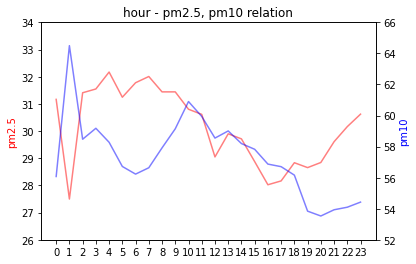

In [14]:
hour_pm25 = train_c.groupby(['hour'])['hour_bef_pm2.5'].mean()
hour_pm10 = train_c.groupby(['hour'])['hour_bef_pm10'].mean()

hour_pm25 = np.array(hour_pm25)
hour_pm10 = np.array(hour_pm10)

# print(hour_pm25)
# print(hour_pm10)

fig, ax1 = plt.subplots()
ax1.plot(x, hour_pm25, color = 'red', alpha = 0.5)
ax1.set_ylabel('pm2.5', color = 'red', rotation = 90)
ax1.set_ylim(26, 34)

ax2 = ax1.twinx()
ax2.plot(x, hour_pm10, color = 'blue', alpha = 0.5)
ax2.set_ylabel('pm10', color = 'blue', rotation = 90)
ax2.set_ylim(52, 66)

plt.xticks(range(24), range(24))
plt.title("hour - pm2.5, pm10 relation")
plt.xlabel("hour")

plt.show()


정리 : pm2.5는 오전에 높고 오후에 낮아진다.
pm10은 일출 이후에 높고 점점 낮아진다.

[3] 시간별 평균 가시성, 풍속 시각화

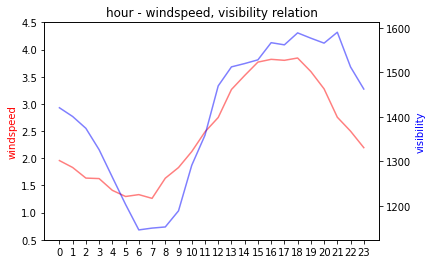

In [15]:
hour_wind = train_c.groupby(['hour'])['hour_bef_windspeed'].mean()
hour_visi = train_c.groupby(['hour'])['hour_bef_visibility'].mean()

hour_wind = np.array(hour_wind)
hour_visi = np.array(hour_visi)

fig, ax1 = plt.subplots()
ax1.plot(x, hour_wind, color = 'red', alpha = 0.5)
ax1.set_ylabel('windspeed', color = 'red', rotation = 90)
ax1.set_ylim(0.5, 4.5)

ax2 = ax1.twinx()
ax2.plot(x, hour_visi, color = 'blue', alpha = 0.5)
ax2.set_ylabel('visibility', color = 'blue', rotation = 90)
# ax2.set_ylim(52, 66)

plt.xticks(range(24), range(24))
plt.title("hour - windspeed, visibility relation")
plt.xlabel("hour")

plt.show()

정리 : 대체적으로 풍속과 가시성은 비슷한 양상을 보인다.

[4] 시간별 강수 횟수

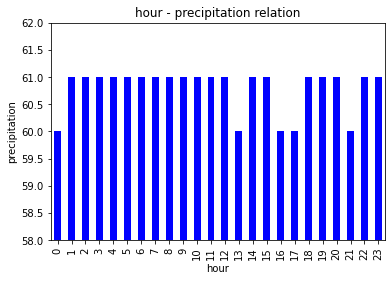

In [16]:
train_c.groupby(['hour'])['hour_bef_precipitation'].count().plot(kind = 'bar', color = 'blue')

plt.title("hour - precipitation relation")

plt.xlabel("hour")
plt.ylabel("precipitation")
plt.ylim([58, 62])

plt.show()

[5] 시간별 평균 오존량 시각화

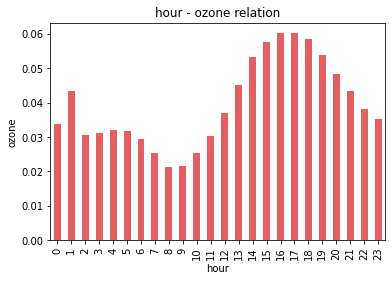

In [17]:

train_c.groupby(['hour'])['hour_bef_ozone'].mean().plot(kind = 'bar', color = '#e35f62')

plt.title("hour - ozone relation")

plt.xlabel("hour")
plt.ylabel("ozone")

plt.show()

오후 시간대에 오존량이 많아진다.

**가설**


> 따릉이 대여수와 가장 관련되어 있을 것 같은 피쳐는 시간별 따릉이 대여수 그래프와 유독 다른 형태의 시간별 그래프를 가진 피쳐들이다.



> 그래서 강수, pm2.5, 습도에 대해 직접 count 수와 비교하고자 한다.




[1] 따릉이 대여수 - 강수 관계 시각화

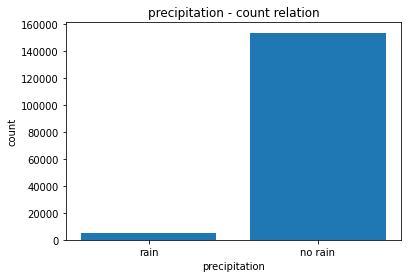

[4982.0, 153412.0]


In [18]:
rain_cnt = []
no_rain_cnt = []

i = 0

for r in train_c['hour_bef_precipitation'] :

  cnt = train_c['count'][i]

  if r == 1.0 :
    rain_cnt.append(cnt)
  else :
    no_rain_cnt.append(cnt)

  i = i+1

y = [np.sum(rain_cnt), np.sum(no_rain_cnt)]
x = ['rain', 'no rain']

plt.bar(x, y)

plt.title("precipitation - count relation")

plt.xlabel("precipitation")
plt.ylabel("count")

plt.show()

print(y)


정리 : 비가 오지 않은 때의 대여량이 압도적으로 많다.

[2]따릉이 대여수 - pm2.5 관계 시각화

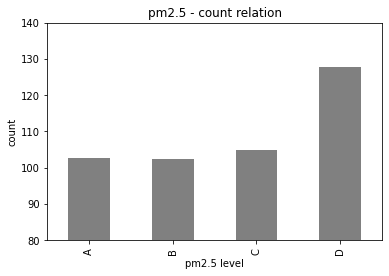

In [19]:
pm25_quantile_25 = np.quantile(train_c['hour_bef_pm2.5'],0.25)
pm25_quantile_50 = np.quantile(train_c['hour_bef_pm2.5'],0.50)
pm25_quantile_75 = np.quantile(train_c['hour_bef_pm2.5'],0.75)

level = []

# D로 갈수록 pm2.5농도는 작아짐

for p in train_c['hour_bef_pm2.5'] :
  if p >= pm25_quantile_75 :
    level.append('A')
  elif p >= pm25_quantile_50 :
    level.append('B')
  elif p >= pm25_quantile_25 :
    level.append('C')  
  else:
    level.append('D')

train_c['level'] = level

train_c.groupby(['level'])['count'].mean().plot(kind = 'bar', color = 'grey')

plt.title("pm2.5 - count relation")

plt.xlabel("pm2.5 level")
plt.ylabel("count")

plt.ylim([80, 140])

plt.show()


[3]따릉이 대여수 - 습도 관계 시각화

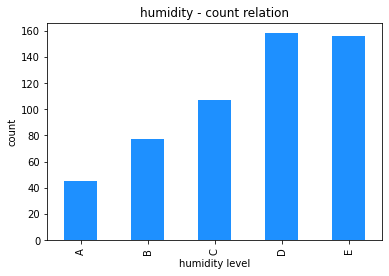

In [20]:
# E로 갈수록 습도는 낮아짐

hum = []

for h in train_c['hour_bef_humidity'] :
  if h >= 80 :
    hum.append('A')
  elif h >= 60 :
    hum.append('B')
  elif h >= 40 :
    hum.append('C')
  elif h >= 20 :
    hum.append('D')
  else:
    hum.append('E')

train_c['hum'] = hum

train_c.groupby(['hum'])['count'].mean().plot(kind = 'bar', color = 'dodgerblue')

plt.title("humidity - count relation")

plt.xlabel("humidity level")
plt.ylabel("count")

plt.show()


정리


> 습도가 낮을수록 따릉이 대여량이 높아진다.


> 비가 오지 않으면 따릉이 대여량이 높아진다.


> pm2.5농도가 낮으면 따릉이 대여량이 높아진다.







#전처리

1. 결측치 보간

In [21]:
#시간(hour)을 기준으로 정렬
train = train.sort_values(by=['hour'])
train.head()

#결측치 앞 뒤 값으로 보간
train.isnull().sum()
train.interpolate(inplace=True)
train.isnull().sum()


id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

2. 이상치 제거



# 모델링

# 튜닝